# CODECON Lecture Note_Networkx

## 简介：为什么使用python Networkx
常用的社会网络分析工具包括 Pajek, Gephi 等。他们各自具有独特的优势。例如，Pajek 的内置算法在计算大规模网络的特征指标时效率更高，但可视化功能很差；Gephi 拥有具有易于操作的可视化分析功能，但是在统计网络特征算法方面不够全面。另外，Pajek Gephi 等软件做为相对闭环的生态系统，在不同系统上进行安装、配置时都会有不少麻烦，并且对导入数据的格式有不同的要求。

Networkx 的优势在于\
第一，做为一个内嵌于python的工具包，可以与excel, csv, txt等文件无缝交互，并处理大型非标准数据集\
第二，内置了经管研究中社会网络分析所需的大多数算法、可视化功能。

本部分Lecture note 将分为5个小节\

0. 社会网络分析常见概念回顾
1. Networkx网络构建
2. Networkx网络节点特征计算
3. Networkx网络特征计算
4. Networkx网络可视化

# 0. 社会网络分析常见概念回顾

社会网络分析（Social Network Analysis，SNA）是一种研究社会结构的方法，它通过图论来分析社会实体（如个人、组织或群体）之间的关系。以下是一些社会网络分析中常见的概念：

1. **节点（Node）/行动者（Actor）**：网络中的个体或实体，可以是人、组织、公司等。

2. **边（Edge）/线（Tie）**：连接两个节点的关系。边可以是双向的（互惠的）或单向的（非互惠的）。

3. **网络（Network）**：由节点和边组成的集合，表示实体之间的关系。

4. **度（Degree）**：一个节点连接的边的数量。在有向网络中，可以区分为入度（指向该节点的边的数量）和出度（从该节点出发指向其他节点的边的数量）。

5. **中心性（Centrality）**：衡量节点在网络中的重要性。常见的中心性指标有度中心性、接近中心性、中间中心性和特征向量中心性。

6. **聚类系数（Clustering Coefficient）**：衡量网络中节点的局部连接紧密程度。高聚类系数意味着一个节点的邻居节点之间也相互连接。

7. **路径（Path）**：网络中从一个节点到另一个节点的一系列边的连接。

8. **最短路径（Shortest Path）**：连接两个节点的路径中边的数量最少的那条路径。

9. **网络密度（Network Density）**：衡量网络中实际存在的边与所有可能边的比例，反映了网络的密集程度。

10. **结构洞（Structural Holes）**：网络中未连接的节点对，它们代表了潜在的机会和信息的流动障碍。

11. **子图（Subgraph）**：网络中的一部分，包含一组特定的节点和连接这些节点的边。

12. **模块化（Modularity）**：衡量网络中社区结构的强度，即网络中社区内部连接的密集程度与社区间连接的稀疏程度。

13. **社区检测（Community Detection）**：识别网络中紧密连接的节点群组，这些群组通常被称为社区或模块。

15. **影响力最大化（Influence Maximization）**：在网络中选择一组节点，使得通过这些节点可以最大化信息或行为的传播。

16. **有向图/无向图

这些概念是社会网络分析的基础，它们帮助研究者理解和解释社会结构的复杂性。通过这些工具，研究者可以分析社会关系如何影响信息传播、群体行为、疾病传播等社会现象。



# 1. Networkx网络构建

## 1.1 Networkx创建网络

Step1: 安装networkx库（如果你还没有安装的话）, 可以使用pip来安装:

In [ ]:
pip install networkx

Step2: 接下来开始编写python代码来创建网络。首先，导入networkx库:

In [1]:
import networkx as nx

Step3: 创建一个空的图。你可以选择不同类型的图，例如无向图（Graph）或有向图（DiGraph）：

nx.Graph()函数将生成一个type = networkx.classes.digraph的类型

In [2]:
# 创建一个无向图
G = nx.Graph()
type(G)
# 创建一个有向图
D = nx.DiGraph()
type(D)

networkx.classes.digraph.DiGraph

Step4: 添向G图中加5个节点（节点是图中的顶点）

In [3]:
# 添加单个节点
G.add_node(1)
G.add_node(2)

# 直接添加多个节点（将节点的名称放置于一个列表中，一起输入）
G.add_nodes_from([3, 4, 5])

Step5: 添加边（边连接两个节点）。
将1-2，2-3，4-5连接在一起

对于无向网络G来说，添加2-3边与添加3-2边代表同样的操作；

In [4]:
# 添加无向边
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 3)
G.add_edge(2, 4)
G.add_edge(2, 5)
G.add_edge(3, 4)

可视化上一个步骤中创建的网络，具体的操作在第5小节中介绍。

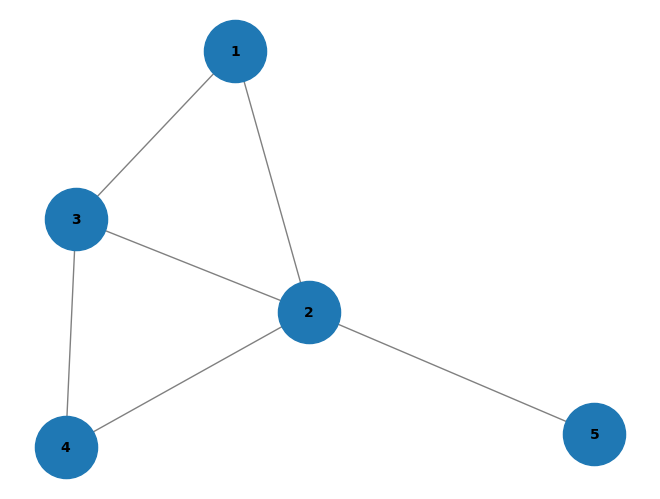

In [5]:
# 绘制图
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, edge_color='gray', node_size=2000, font_size=10, font_weight='bold')

In [ ]:
# 向无向边添加权重
G.add_edge(1, 2, weight = 1)
G.add_edge(1, 3, weight = 0.5)
G.add_edge(2, 3, weight = 0.3)
G.add_edge(2, 4, weight = 0.5)
G.add_edge(2, 5, weight = 0.1)
G.add_edge(3, 4, weight = 0.5)

## 1.2 Networkx导入网络

在社会网络分析中有两种常用的网络表现形式，一种是边列表（edge list）形式，另一种是邻接矩阵（adjacency matrix）形式。
以在1.1中创建的网络为例，该网络可以表示为：

边列表
  1 2 3 4 5 
1
2
3
4
5
邻接矩阵

In [19]:
for line in nx.generate_adjlist(G):
    print(line)

1 2 3
2 3 4 5
3 4
4
5
